In [6]:
!pip install roboflow
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 90.6 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [7]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="IRuBYZn8jB6xwEGX972R")
project = rf.workspace("reemaoffside").project("offside-apojc-bcpva")
version = project.version(4)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Offside-4 in yolov8:: 100%|██████████| 372/372 [00:00<00:00, 6921.36it/s]


In [8]:
!ls /content

data.yaml		README.dataset.txt   sample_data  valid
Offside-4		README.roboflow.txt  test	  yolov8n.pt
Offside.v1i.yolov8.zip	runs		     train


In [12]:
!ls Offside-4
!ls Offside-4/valid

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid
images	labels


In [22]:
with open("Offside-4/data.yaml", "w") as f:
    f.write("""train: /content/Offside-4/train/images
val: /content/Offside-4/valid/images

nc: 5
names: ["Goalkeeper", "Man C", "Man U", "Referee", "Ball"]
""")


In [23]:
#تدريب
!yolo task=detect mode=train model=yolov8n.pt data=Offside-4/data.yaml epochs=50 imgsz=640


Ultralytics 8.3.115 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=Offside-4/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train9, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, for

In [24]:
from google.colab import files
uploaded = files.upload()

Saving offside3.png to offside3.png


In [25]:
#اختبار
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt source="offside3.png" save=True save_txt=True



Ultralytics 8.3.115 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/offside3.png: 288x640 12 Man Cs, 1 Man U, 114.6ms
Speed: 3.6ms preprocess, 114.6ms inference, 6.7ms postprocess per image at shape (1, 3, 288, 640)
Results saved to runs/detect/predict
1 label saved to runs/detect/predict/labels
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [29]:
!ls runs/detect/predict/


labels	offside3.jpg


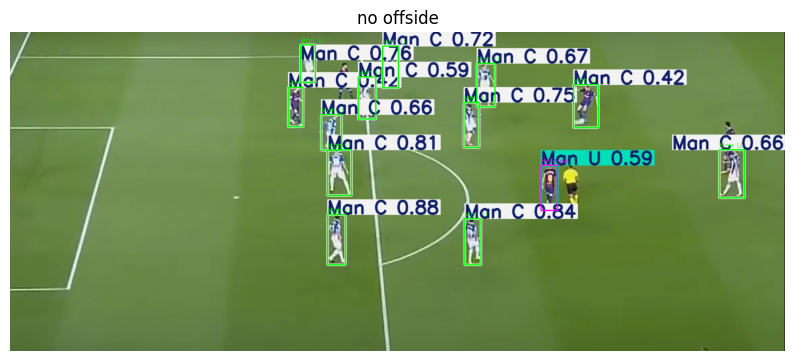

In [30]:
import cv2
import matplotlib.pyplot as plt
import os
image_path = "runs/detect/predict/offside3.jpg"
label_path = "runs/detect/predict/labels/offside3.txt"

id_to_class = {
    0: "Goalkeeper",
    1: "Man C",
    2: "Man U",
    3: "Referee",
    4: "Ball"
}

colors = {
    "Goalkeeper": (0, 255, 255),
    "Man C": (255, 255, 0),
    "Man U": (0, 255, 0),
    "Referee": (255, 0, 255),
    "Ball": (255, 255, 255),
    "Offside": (0, 0, 255)
}

img = cv2.imread(image_path)
h, w, _ = img.shape
boxes = []
defender_x = None
msg = "no offside"
# قراءة الإحداثيات
if os.path.exists(label_path):
    with open(label_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            cls_id = int(parts[0])
            x_center = float(parts[1])
            y_center = float(parts[2])
            bw = float(parts[3])
            bh = float(parts[4])

            x1 = int((x_center - bw/2) * w)
            y1 = int((y_center - bh/2) * h)
            x2 = int((x_center + bw/2) * w)
            y2 = int((y_center + bh/2) * h)
            cls_name = id_to_class.get(cls_id, "Unknown")

            boxes.append({"cls": cls_name, "x": x_center, "x1": x1, "y1": y1, "x2": x2, "y2": y2})

            if cls_name == "Man C":
                if defender_x is None or x_center > defender_x:
                    defender_x = x_center

# رسم البوكسات والتلوين
for box in boxes:
    color = colors.get(box["cls"], (255, 255, 255))

    if box["cls"] == "Man U" and defender_x is not None and box["x"] < defender_x:
        color = colors["Offside"]
        msg = "detect the offside!"

    cv2.rectangle(img, (box["x1"], box["y1"]), (box["x2"], box["y2"]), color, 2)
    cv2.putText(img, box["cls"], (box["x1"], box["y1"] - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)

if defender_x:
    x_def_pixel = int(defender_x * w)
    cv2.line(img, (x_def_pixel, 0), (x_def_pixel, h), (255, 0, 0), 2)

# عرض الصورة + الرسالة
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis('off')
plt.title(msg)
plt.show()
